In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
import shap
import matplotlib.pyplot as plt

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
dataset = 'RDKit'
reactiontype = 'CO'

data = pd.read_csv(f'data/data_{dataset}.csv')
y = pd.DataFrame(data[f'Yield_{reactiontype}'], columns=[f'Yield_{reactiontype}'])
X = data.drop(columns=['Name', 'ID', 'Yield_CO', 'Yield_CS', 'Yield_CN'])

In [3]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=1, max_depth=4,
                              max_leaf_nodes=7, min_samples_leaf=3,
                              random_state=0)
0.9996927237472655


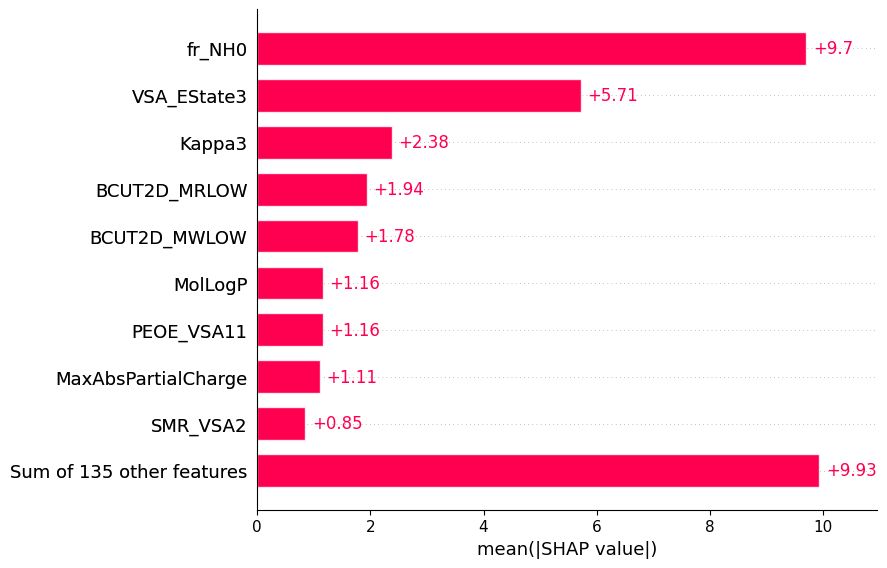

In [4]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

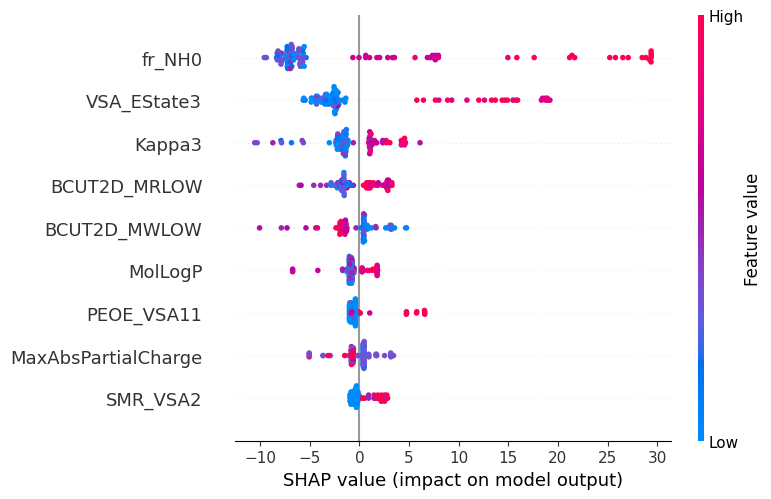

In [5]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()

In [6]:
reactiontype = 'CS'

y = pd.DataFrame(data[f'Yield_{reactiontype}'],columns=[f'Yield_{reactiontype}'])
y

,Yield_CS
0,99
1,45
2,23
3,98
4,0
...,...
95,0
96,0
97,0
98,0


In [7]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=1, max_depth=4,
                              max_leaf_nodes=5, min_samples_leaf=3,
                              random_state=0)
0.9842587197312154


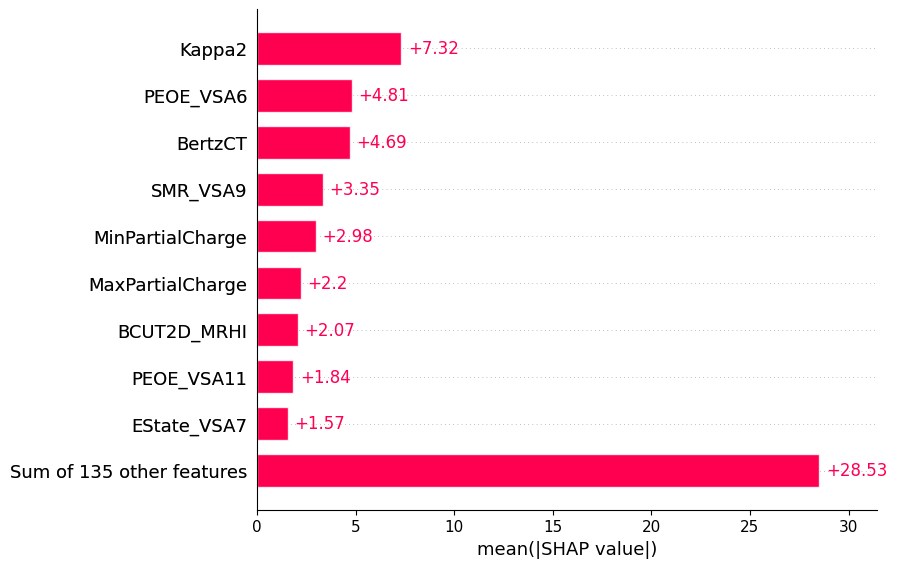

In [8]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

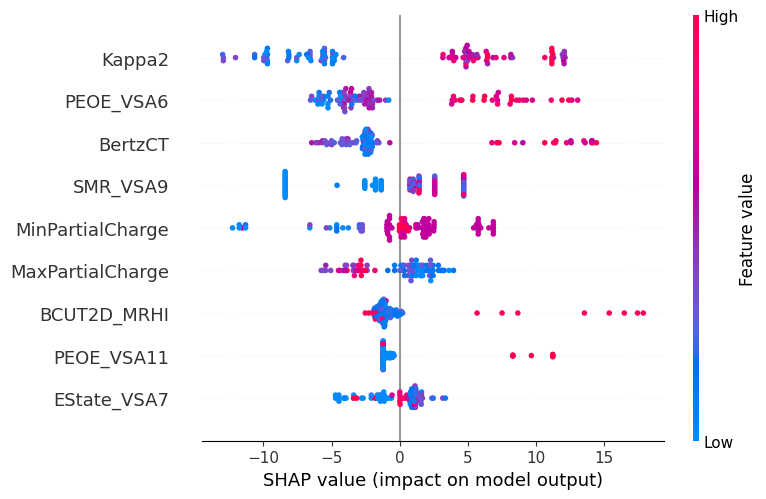

In [9]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()

In [10]:
reactiontype = 'CN'

y = pd.DataFrame(data[f'Yield_{reactiontype}'],columns=[f'Yield_{reactiontype}'])
y

,Yield_CN
0,95
1,98
2,97
3,10
4,33
...,...
95,0
96,1
97,1
98,0


In [11]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=0, max_depth=4,
                              max_leaf_nodes=7, min_samples_leaf=3,
                              random_state=0)
0.9990861314641616


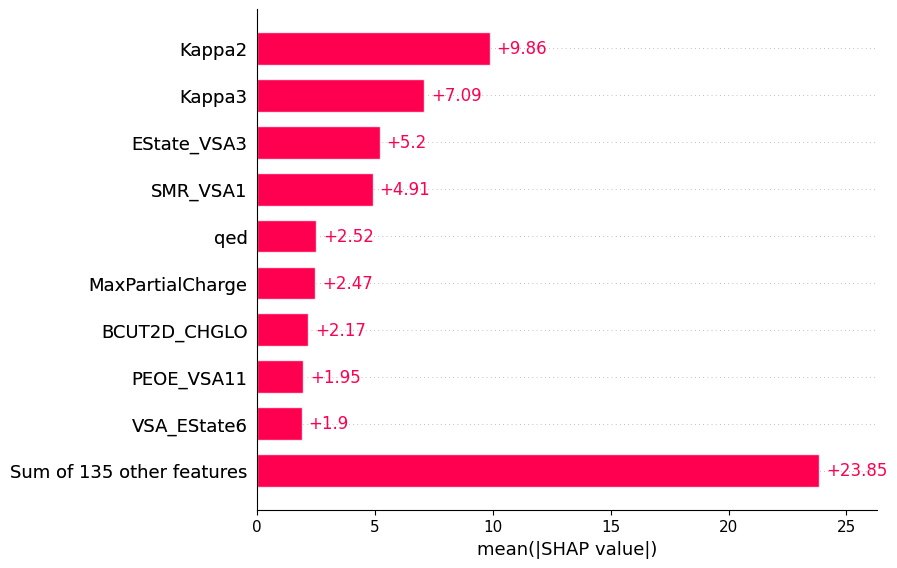

In [12]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

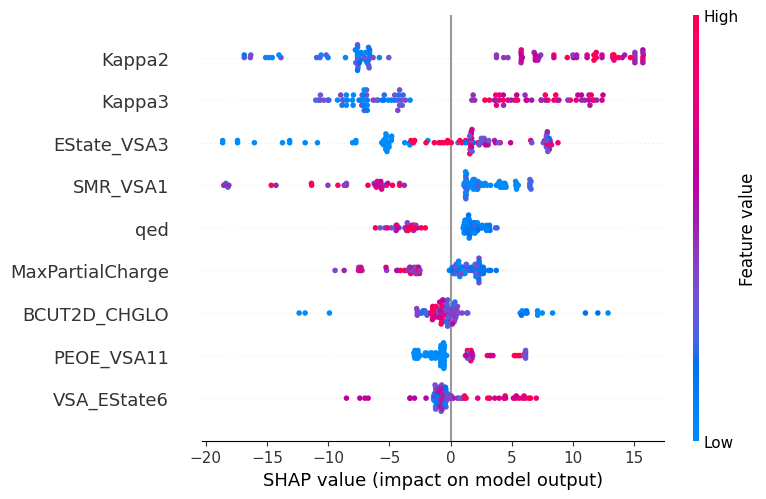

In [13]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()

In [14]:
dataset = 'mordred'
reactiontype = 'CO'

data = pd.read_csv(f'data/data_{dataset}.csv')
y = pd.DataFrame(data[f'Yield_{reactiontype}'], columns=[f'Yield_{reactiontype}'])
X = data.drop(columns=['Name', 'ID', 'Yield_CO', 'Yield_CS', 'Yield_CN'])
print(X.head())
y

         ABC      ABCGG  nBase     SpAbs_A   SpMax_A  SpDiam_A      SpAD_A  \
0  51.112698  37.059654      0   86.597960  2.689922  5.293219   86.597960   
1  77.061286  54.950651      0  116.949390  2.700910  5.308129  116.949390   
2  57.644671  41.246677      0   93.653582  2.695287  5.300279   93.653582   
3  57.644671  41.246677      0   93.653582  2.695287  5.300279   93.653582   
4  62.426407  44.258073      0  106.095220  2.696397  5.301785  106.095220   

    SpMAD_A   LogEE_A     VE1_A  ...      SRW10      TSRW10           MW  \
0  1.396741  5.117342  6.557811  ...  11.492202  121.288808   788.268845   
1  1.244142  5.508681  7.356815  ...  11.919010  155.394194  1236.769647   
2  1.337908  5.230233  6.815538  ...  11.607917  129.878025   900.394045   
3  1.337908  5.230233  6.815538  ...  11.607917  129.878025  1411.552942   
4  1.360195  5.323750  6.926423  ...  11.654260  138.197219  1028.353362   

         AMW  WPath  WPol  Zagreb1  Zagreb2   mZagreb1   mZagreb2  
0   8.

,Yield_CO
0,62
1,83
2,73
3,69
4,33
...,...
95,0
96,0
97,0
98,0


In [15]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=0, max_depth=4,
                              max_leaf_nodes=3, min_samples_leaf=5,
                              random_state=0)
0.9953446965663904


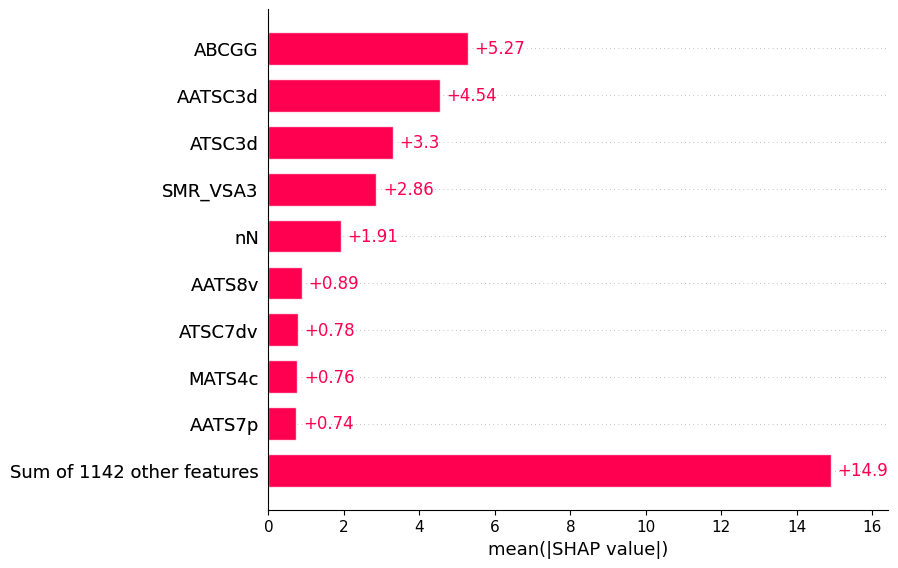

In [16]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

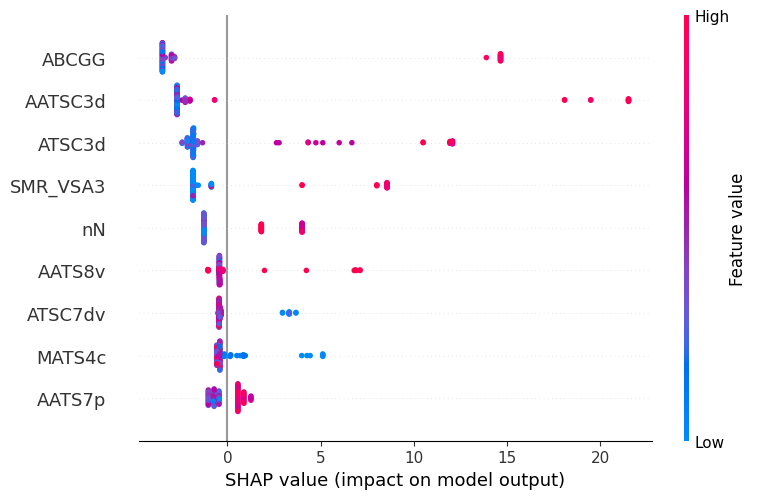

In [17]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()

In [18]:
reactiontype = 'CS'

y = pd.DataFrame(data[f'Yield_{reactiontype}'],columns=[f'Yield_{reactiontype}'])
y

,Yield_CS
0,99
1,45
2,23
3,98
4,0
...,...
95,0
96,0
97,0
98,0


In [19]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=0.1, max_depth=6,
                              max_leaf_nodes=7, min_samples_leaf=3,
                              random_state=0)
0.9999528007063111


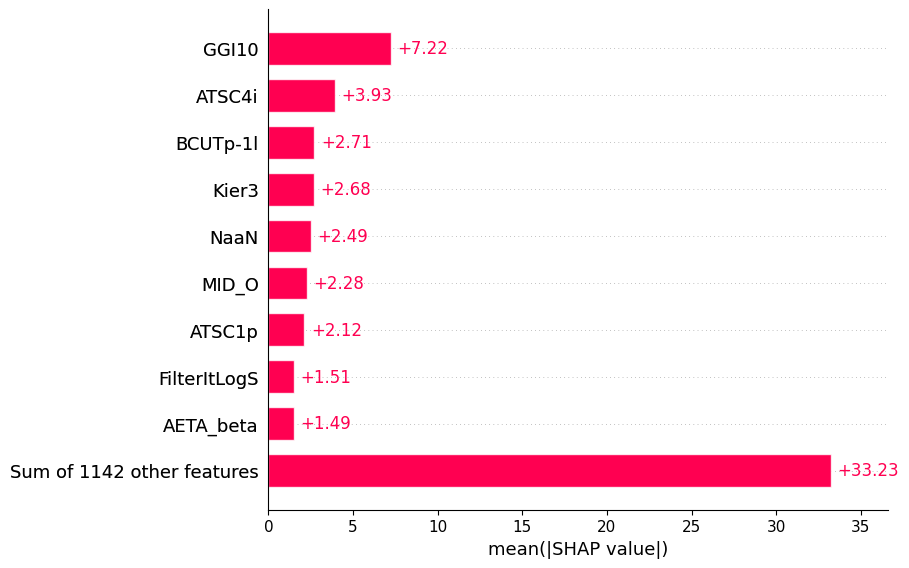

In [20]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

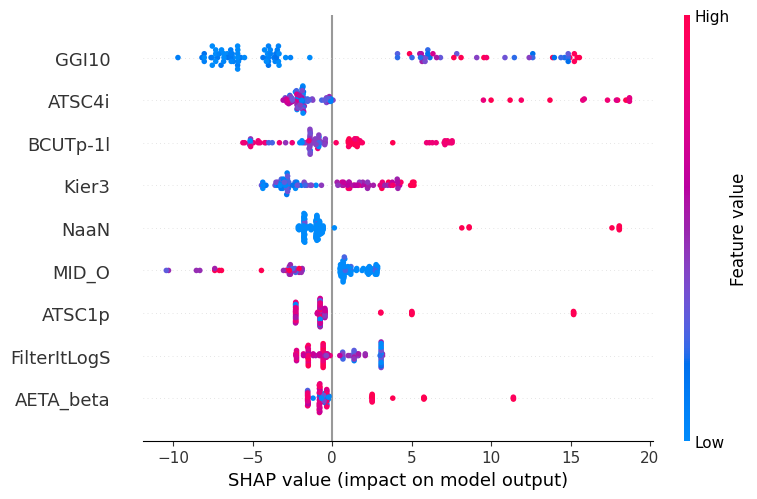

In [21]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()

In [22]:
reactiontype = 'CN'

y = pd.DataFrame(data[f'Yield_{reactiontype}'],columns=[f'Yield_{reactiontype}'])
y

,Yield_CN
0,95
1,98
2,97
3,10
4,33
...,...
95,0
96,1
97,1
98,0


In [23]:
param = {"max_leaf_nodes": [3, 5, 7], "max_depth": [4, 6], "l2_regularization": [0, 0.1, 1],
         "min_samples_leaf": [3, 5]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0),
                   param_grid=param, cv=5)
reg.fit(X, y[f'Yield_{reactiontype}'])
best = reg.best_estimator_
print(reg.best_estimator_)
y_pred = best.predict(X)

print(metrics.r2_score(y, y_pred))

HistGradientBoostingRegressor(l2_regularization=1, max_depth=4,
                              max_leaf_nodes=5, min_samples_leaf=5,
                              random_state=0)
0.998980396279821


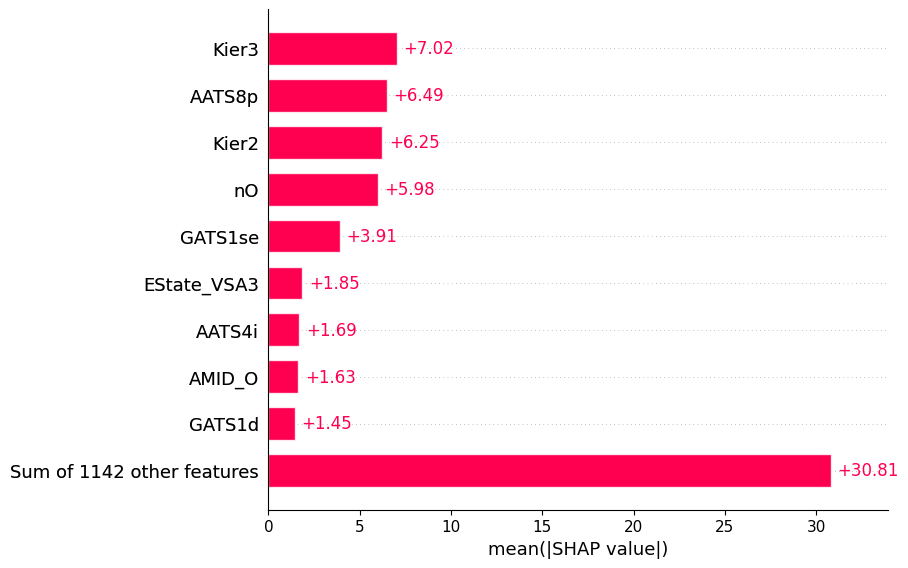

In [24]:
explainer = shap.TreeExplainer(best)
shap_values = explainer(X)
fig = plt.figure()
shap.plots.bar(shap_values)
plt.show()

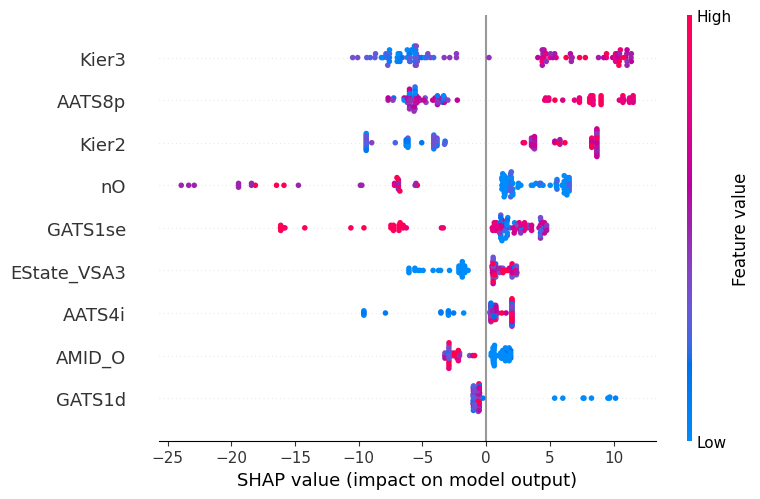

In [25]:
fig = plt.figure()
shap.summary_plot(shap_values, max_display=9)
plt.show()